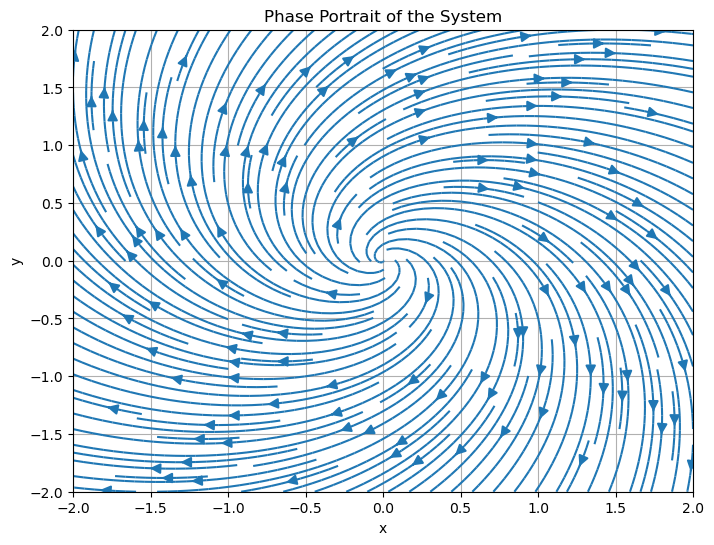

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def system_of_equations(x, y):
    """
    Define the system of first-order differential equations.
    dx/dt = f(x, y)
    dy/dt = g(x, y)
    """
    dx_dt = 3*x + 4*y
    dy_dt = -4*x + 3*y
    return dx_dt, dy_dt

# Define the range and number of points for plotting
x_range = np.linspace(-2, 2, 20)
y_range = np.linspace(-2, 2, 20)


# Create a grid of initial conditions
X, Y = np.meshgrid(x_range, y_range)

# Calculate the derivatives at each point in the grid
DX, DY = system_of_equations(X, Y)


# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, DX, DY, density=2.0, arrowsize=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2,2)
plt.title('Phase Portrait of the System')
plt.grid()
plt.show()

            
            
            
    
    
    

In [3]:
from sympy import *
t = symbols('t', positive=True) # define variable t
y = Function('y') # define function y(t)
deq = y(t).diff(t,2)+2*y(t).diff(t,1)+10*y(t)-2*sin(3*t) # differential equation


L_deq = laplace_transform(deq,t,s,noconds=True) # take the Laplace transform of the differential equ
L_y = laplace_transform(y(t),t,s, noconds=True) # define L_y = L{y(t)}
Y = symbols('Y') # introduce symbol Y = L_y
L_deq_1 = L_deq.subs(L_y, Y) # substitute Y for L{y(t)}
ics = {y(0):1, y(t).diff(t,1).subs(t,0):0} # define initial conditions
L_deq_2 = L_deq_1.subs(ics) # plug in initial conditions
Y_soln = solve(L_deq_2,Y) # solve for Y_sol = Y(s) = L{y(t)}
y_soln = inverse_laplace_transform(Y_soln[0], s, t) # find the inverse Laplace transform
print('The solution is ', y_soln)
plot(y_soln, (t,0,10))

NameError: name 's' is not defined

In [ ]:
# Let us verify the solution above
y_soln_1 = dsolve(deq, y(t), ics=ics)
print('The solution is ', y_soln_1.rhs)
The solution is (43*sin(3*t)/111 + 49*cos(3*t)/37)*exp(-t) + 2*sin(3*t)/37 - 12*cos(3*t)/37
plot(y_soln_1.rhs, (t,0,10))


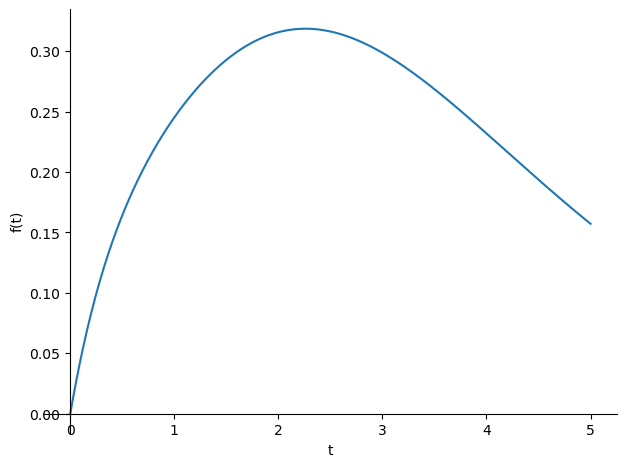

In [4]:
from sympy import *
t = symbols('t')
y = Function('y')
g = Function('g')
# this code solves y'' + c*y' + r*y = g(t), y(0) = 0, y'(0) = 0.5
# where c = 2, r = 1, and g(t) = t*exp(-t)
c, r = 2, 1
g = t*exp(-t)
deq = y(t).diff(t,2)+c*y(t).diff(t,1)+r*y(t)-g # the differential equation
soln = dsolve(deq,y(t),ics={y(0):0,y(t).diff(t,1).subs(t,0):0.5}) # solve equation with initial conditions
soln
plot(soln.rhs, (t,0,5), adaptive = False, nb_of_points = 500) # plot the solution for t in (0, 5)

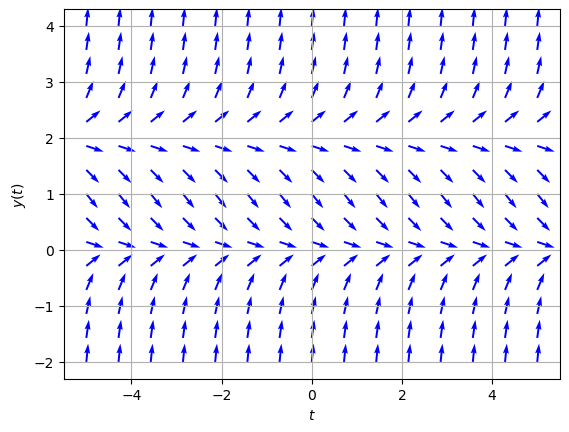

In [7]:
import numpy as np
from matplotlib import pyplot as plt
# purpose: plot direction (slope) fields of a differential equation
# y' = f(t, y)
def ode_rhs(t, y): # define the right side f(t,y) = y*(y-2)
    f = y*(y-2)
    return f

t = np.linspace(-5,5,15) # the range of t values [-5,5] at 15 points
y = np.linspace(-2,4,15) # the range of y values [-2,4] at 15 points
T,Y = np.meshgrid(t,y) # create a grid of the t-y values
DT = np.ones_like(T)
DY = ode_rhs(T,Y)
S = (DT**2+DY**2)**0.5
plt.figure()
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.quiver(T, Y, DT/S, DY/S, angles='xy', color='b') # plot direction field arrows
plt.grid()


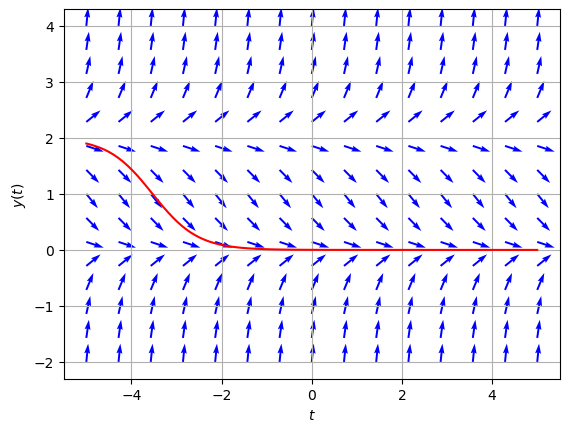

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
# purpose: plot direction (slope) fields of a differential equation
# y' = f(t, y)
def ode_rhs(t, y): # define the right side f(t,y) = y*(y-2)
    f = y*(y-2)
    return f
t = np.linspace(-5,5,15) # the range of t values [-5,5] at 15 points
y = np.linspace(-2,4,15) # the range of y values [-2,4] at 15 points
T,Y = np.meshgrid(t,y) # create a grid of the t-y values
DT = np.ones_like(T)
DY = ode_rhs(T,Y)
S = (DT**2+DY**2)**0.5
plt.figure()
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.quiver(T, Y, DT/S, DY/S, angles='xy', color='b') # plot direction field arrows
soln = solve_ivp(ode_rhs, t_span=(-5,5), y0=[1.9],method='RK45',
t_eval=np.linspace(-5,5,100)) # exact solution
plt.plot(soln.t,soln.y[0,:],color='r')
plt.grid()


In [10]:
from sympy import *                               # import all functions in sympy

t = symbols('t')                                  # declare the symbol t
y = Function('y')(t)                              # declare the function y
A, B = symbols('A B', constant=True)              # define the constants A, B
y = A*t*exp(-t)*cos(2*t) + B*t*exp(-t)*sin(2*t)   # guess of the particular solution
DE = y.diff(t,2)+2*y.diff(t)+5*y                  # plug guess ino differential equation
simplify(DE)                                      # simplify the expression to cancel out terms

4*(-A*sin(2*t) + B*cos(2*t))*exp(-t)